In [26]:
import numpy as np
import matplotlib.pyplot as plt

from src.exponential_regression import ExponentialRegression
from src.loss import ChiSquaredLoss

from sklearn.preprocessing import StandardScaler

## One exponential term example

In [27]:
measurements = 100
measurement_errors = .5

x = np.linspace(-10, 10, measurements).reshape(-1, 1)
y = (2 * np.exp(-0.25 * x) + np.random.normal(0, measurement_errors, x.shape)).ravel()

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1))

Text(0.5, 1.0, 'Standardized test data')

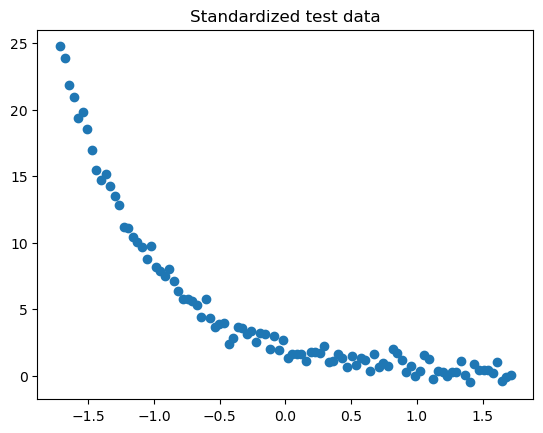

In [29]:
plt.scatter(x_scaled, y)
plt.title('Standardized test data')

In [30]:
loss = ChiSquaredLoss(measurements, measurement_errors)
model = ExponentialRegression(n_terms=1, loss_function=loss)
model.fit(x_scaled, y)

ExponentialRegression(loss_function=ChiSquaredLoss)

In [31]:
model.lambda_, model.omega_

(array([1.98118689]), array([-1.46497666]))

In [32]:
modeled_y = model.predict(x_scaled)

Text(0, 0.5, 'y')

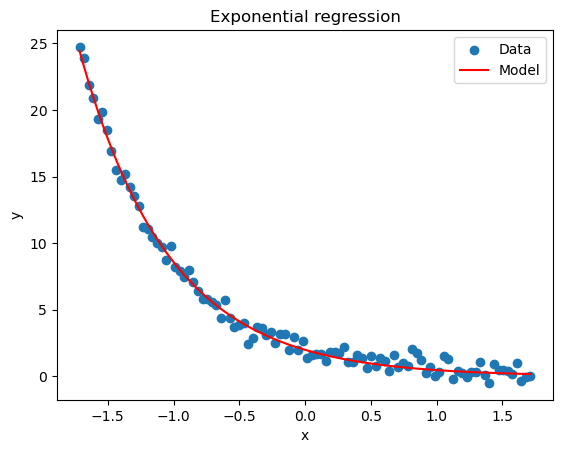

In [33]:
plt.scatter(x_scaled, y)
plt.plot(x_scaled, modeled_y, color='red')

plt.title("Exponential regression")
plt.legend(["Data", "Model"])
plt.xlabel("x")
plt.ylabel("y")

## Two exponential terms example (poor fit)

In [34]:
measurements = 100
measurement_errors = 1 / 20
x = np.linspace(0, 10, measurements).reshape(-1, 1)
y = (2 * np.exp(-0.25 * x) + (-5) * np.exp(-2 * x)).ravel()
y += np.random.normal(0, measurement_errors, measurements)

In [35]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Text(0, 0.5, 'y')

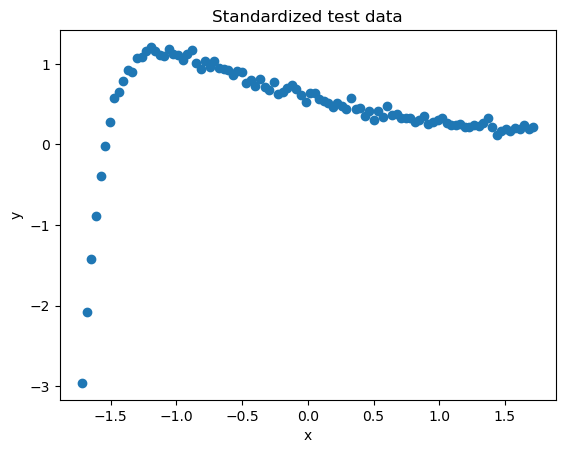

In [36]:
plt.scatter(x_scaled, y)
plt.title('Standardized test data')
plt.xlabel("x")
plt.ylabel("y")

In [37]:
loss = ChiSquaredLoss(measurements, measurement_errors)
model = ExponentialRegression(n_terms=2, loss_function=loss)
model.fit(x_scaled, y)

ExponentialRegression(loss_function=ChiSquaredLoss, n_terms=2)

Text(0, 0.5, 'y')

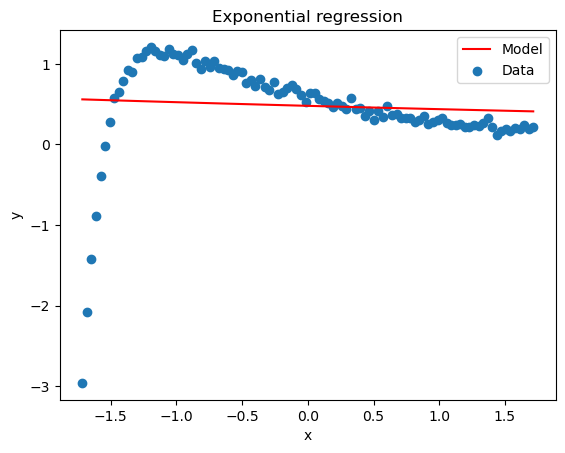

In [38]:
plt.plot(x_scaled, model.predict(x_scaled), color='red')
plt.scatter(x_scaled, y)
plt.title("Exponential regression")
plt.legend(["Model", "Data"])
plt.xlabel("x")
plt.ylabel("y")

## Two exponential terms example (good fit)

We can try to fit the model with a better initial guess for the parameters.

Initial guesses may be found by grid search or data inspection

In [39]:
measurements = 100
measurement_errors = 1 / 20
x = np.linspace(0, 10, measurements).reshape(-1, 1)
y = (2 * np.exp(-0.25 * x) + (-5) * np.exp(-2 * x)).ravel()
y += np.random.normal(0, measurement_errors, measurements)

In [40]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Text(0, 0.5, 'y')

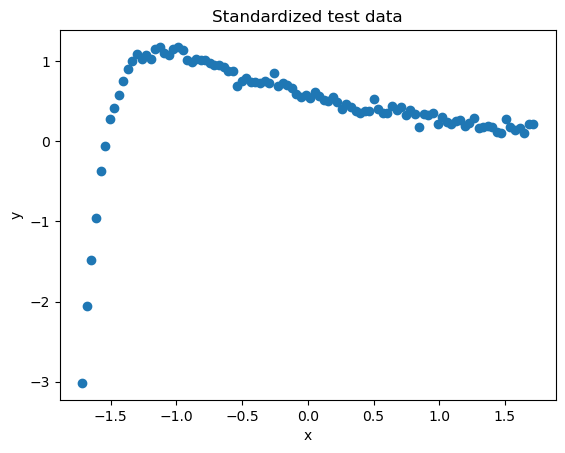

In [41]:
plt.scatter(x_scaled, y)
plt.title('Standardized test data')
plt.xlabel("x")
plt.ylabel("y")

In [42]:
loss = ChiSquaredLoss(measurements, measurement_errors)
model = ExponentialRegression(n_terms=2, loss_function=loss)
model.fit(x_scaled, y, initial_lambda=np.array([1., -1.]), initial_omega=np.array([-1., -1.]))

ExponentialRegression(loss_function=ChiSquaredLoss, n_terms=2)

Text(0, 0.5, 'y')

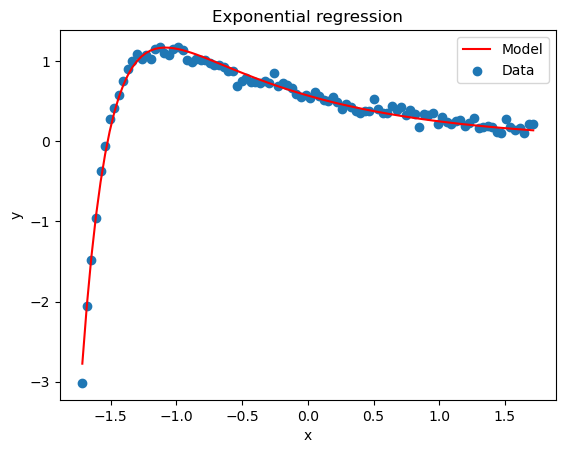

In [43]:
plt.plot(x_scaled, model.predict(x_scaled), color='red')
plt.scatter(x_scaled, y)
plt.title("Exponential regression")
plt.legend(["Model", "Data"])
plt.xlabel("x")
plt.ylabel("y")